In [1]:
import re
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

    java -Xmx4g -jar snpEff.jar GRCh37.75 ../patient-data/Exome/variants.vcf \
        > ../results/exome-variants-snpeff-grch37.75.vcf
        

In [397]:
x = 'DEL008931SUR'
def get_del_len(x):
    gr = re.match('(DEL|INV)(?P<length>[0-9]+)', x,)
    if gr is not None:
        return int(gr.groupdict()['length'])
    else:
        return 1
    
map_Annotation_Impact = {vv:kk for kk,vv in enumerate(['LOW', 'MODERATE', 'MODIFIER', 'HIGH',])}

copy from gcp bucket:
    
    gsutil -m cp gs://svai-ud1-scratch-northamerica/genes-bed/all-variants-snpeff-grch37.75-gencode-annotations-pass-homozygous.vcf.gz

In [618]:
fn = 'results/all-variants-snpeff-grch37.75-gencode-annotations-pass-homozygous.vcf.gz'
variants = pd.read_csv(,
    sep='\t')

variants.shape

(1995031, 29)

/tools/miniconda/envs/jupyter-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,6,10,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [468]:
variants.head()

,#CHROM,AA.pos.length,ALT,Allele,Annotation,Annotation_Impact,CDS.pos.length,Distance,ERRORS,FILTER,...,QUAL,REF,RESULT,Rank,Transcript_BioType,cDNA.pos.length,type,Annotation_Impact_Int,length,CDS.length
0,chr1,NaN,<DEL>,<DEL>,upstream_gene_variant,MODIFIER,NaN,3007.0,WARNING_TRANSCRIPT_NO_STOP_CODON,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",NaN,protein_coding,NaN,cnv,2,30,NaN
1,chr1,NaN,<DEL>,<DEL>,upstream_gene_variant,MODIFIER,NaN,5203.0,WARNING_TRANSCRIPT_NO_START_CODON,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",NaN,protein_coding,NaN,cnv,2,30,NaN
2,chr1,NaN,<DEL>,<DEL>,intron_variant,MODIFIER,NaN,NaN,NaN,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",4/13,protein_coding,NaN,cnv,2,30,NaN
3,chr1,NaN,<DEL>,<DEL>,intron_variant,MODIFIER,NaN,NaN,WARNING_TRANSCRIPT_NO_STOP_CODON,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",4/6,protein_coding,NaN,cnv,2,30,NaN
4,chr1,NaN,<DEL>,<DEL>,intron_variant,MODIFIER,NaN,NaN,WARNING_TRANSCRIPT_NO_STOP_CODON,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",4/4,protein_coding,NaN,cnv,2,30,NaN


/tools/miniconda/envs/jupyter-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


(6, 89125.0938133746)

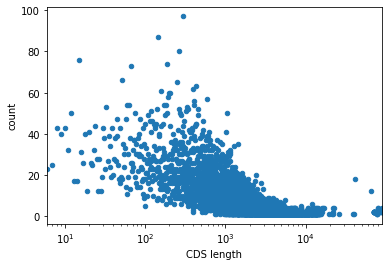

In [620]:
mask = ~variants['CDS.pos.length'].isnull()
cds_lengths = variants.loc[mask, 'CDS.length'].value_counts().sort_index().reset_index()
cds_lengths.columns = ['CDS length', 'count']
#index	CDS.length
cds_lengths.plot(x='CDS length', y='count', kind='scatter',)
plt.xscale('log')
plt.xlim([0,6])

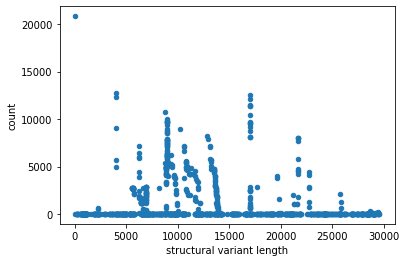

In [621]:
mask = (variants['length']>1)
del_lengths = variants.loc[mask, 'length'].value_counts().sort_index().reset_index()
del_lengths.columns = ['structural variant length', 'count']
del_lengths.plot(x='structural variant length', y='count', kind='scatter',)

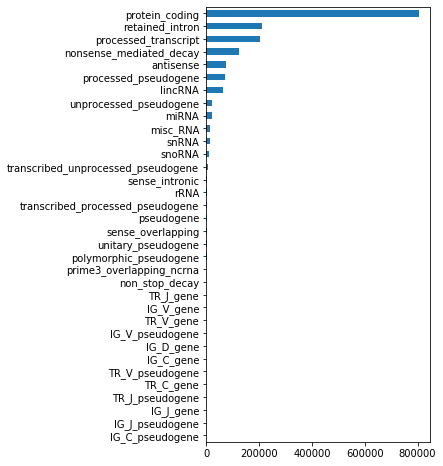

In [625]:
fig, ax = plt.subplots(1, figsize=(4,8))
variants.Transcript_BioType.value_counts()[::-1].plot(kind='barh', ax=ax)

In [626]:
variants.columns

Index(['#CHROM', 'AA.pos.length', 'ALT', 'Allele', 'Annotation',
       'Annotation_Impact', 'CDS.pos.length', 'Distance', 'ERRORS', 'FILTER',
       'FORMAT', 'Feature_ID', 'Feature_Type', 'Gene_ID', 'Gene_Name',
       'HGVS.c', 'HGVS.p', 'ID', 'POS', 'QUAL', 'REF', 'RESULT', 'Rank',
       'Transcript_BioType', 'cDNA.pos.length', 'type',
       'Annotation_Impact_Int', 'length', 'CDS.length'],
      dtype='object')

In [627]:
variants.head()

,#CHROM,AA.pos.length,ALT,Allele,Annotation,Annotation_Impact,CDS.pos.length,Distance,ERRORS,FILTER,...,QUAL,REF,RESULT,Rank,Transcript_BioType,cDNA.pos.length,type,Annotation_Impact_Int,length,CDS.length
0,chr1,NaN,<DEL>,<DEL>,upstream_gene_variant,MODIFIER,NaN,3007.0,WARNING_TRANSCRIPT_NO_STOP_CODON,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",NaN,protein_coding,NaN,cnv,2,30,NaN
1,chr1,NaN,<DEL>,<DEL>,upstream_gene_variant,MODIFIER,NaN,5203.0,WARNING_TRANSCRIPT_NO_START_CODON,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",NaN,protein_coding,NaN,cnv,2,30,NaN
2,chr1,NaN,<DEL>,<DEL>,intron_variant,MODIFIER,NaN,NaN,NaN,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",4/13,protein_coding,NaN,cnv,2,30,NaN
3,chr1,NaN,<DEL>,<DEL>,intron_variant,MODIFIER,NaN,NaN,WARNING_TRANSCRIPT_NO_STOP_CODON,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",4/6,protein_coding,NaN,cnv,2,30,NaN
4,chr1,NaN,<DEL>,<DEL>,intron_variant,MODIFIER,NaN,NaN,WARNING_TRANSCRIPT_NO_STOP_CODON,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",4/4,protein_coding,NaN,cnv,2,30,NaN


## Case: CCK gene deletion

In [776]:
mask = variants['Gene_Name'] == 'CCK'
variants[mask].head()

,#CHROM,AA.pos.length,ALT,Allele,Annotation,Annotation_Impact,CDS.pos.length,Distance,ERRORS,FILTER,...,QUAL,REF,RESULT,Rank,Transcript_BioType,cDNA.pos.length,type,Annotation_Impact_Int,length,CDS.length
22697,chr3,NaN,<DEL>,<DEL>,feature_ablation,HIGH,NaN,NaN,NaN,PASS,...,5.0,N,1/1:DELLY,NaN,NaN,NaN,cnv,3,4016,NaN
23654,chr3,NaN,<DEL>,<DEL>,transcript_ablation,HIGH,NaN,NaN,NaN,PASS,...,5.0,N,1/1:DELLY,3/3,protein_coding,NaN,cnv,3,4016,NaN
25082,chr3,NaN,<DEL>,<DEL>,transcript_ablation,HIGH,NaN,NaN,NaN,PASS,...,5.0,N,1/1:DELLY,2/5,protein_coding,NaN,cnv,3,4016,NaN
25083,chr3,NaN,<DEL>,<DEL>,transcript_ablation,HIGH,NaN,NaN,NaN,PASS,...,5.0,N,1/1:DELLY,3/3,protein_coding,NaN,cnv,3,4016,NaN
25084,chr3,NaN,<DEL>,<DEL>,transcript_ablation,HIGH,NaN,NaN,NaN,PASS,...,5.0,N,1/1:DELLY,1/2,retained_intron,NaN,cnv,3,4016,NaN


In [767]:
variants[mask]['POS'].value_counts()

22739189    20
27135219     5
42305131     4
Name: POS, dtype: int64

In [764]:
variants[mask]['length'].value_counts()

4019    5
4018    5
4017    5
4016    5
4045    5
1       4
Name: length, dtype: int64

In [11]:
# outfn = 'local-patient-data/Exome/variants.vcf'
# os.makedirs(os.path.dirname(outfn), exist_ok = True)

# with open(fn) as fh, open(outfn,'w+') as outfh:
#     for line in fh:
#         if line.startswith('#'):
#             print(line, end='', file=outfh)
#         else:
#             print('chr'+line, end='', file=outfh)

## Read Reference Tissue RNA Expression Data

In [480]:
fn = 'refs/proteinatlas/rna_tissue.tsv'
protein_atlas = pd.read_table(fn)

/tools/miniconda/envs/jupyter-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [267]:
print('\t'.join(protein_atlas.Sample.value_counts().index.tolist()))

appendix	stomach	skin	gallbladder	spleen	rectum	placenta	parathyroid gland	smooth muscle	prostate	colon	salivary gland	testis	liver	esophagus	thyroid gland	kidney	adipose tissue	seminal vesicle	cerebral cortex	lung	endometrium	skeletal muscle	fallopian tube	cervix, uterine	small intestine	bone marrow	tonsil	breast	heart muscle	pancreas	epididymis	duodenum	lymph node	urinary bladder	adrenal gland	ovary


In [768]:
protein_atlas.head(3)

,Gene,Gene name,Sample,Value,Unit
0,ENSG00000000003,TSPAN6,adipose tissue,31.5,TPM
1,ENSG00000000003,TSPAN6,adrenal gland,26.4,TPM
2,ENSG00000000003,TSPAN6,appendix,9.2,TPM


## Derive GI-specific expression score

In [268]:
positive = {'stomach', 'duodenum', 'small intestine'}
negative = {'lung', 'skeletal muscle', 'prostate', 'skin',
            'breast', 'ovary', 'bone marrow', 'adipose tissue'}

In [270]:
neg_mask = protein_atlas.Sample.map(lambda x: x in negative)
pos_mask = protein_atlas.Sample.map(lambda x: x in positive)

In [271]:
mean_neg_expression = protein_atlas[neg_mask].groupby(['Gene name'])['Value'].mean()
var_neg_expression = protein_atlas[neg_mask].groupby(['Gene name'])['Value'].var()

var_total_expression = protein_atlas.groupby(['Gene name'])['Value'].var()

In [272]:
pos_expression = protein_atlas[pos_mask].groupby(['Sample','Gene name'])['Value'].mean()

In [486]:
# mean_neg_expression
# protein_atlas
eps = var_total_expression[var_neg_expression>0].min()/100
diff_expression = (pos_expression - mean_neg_expression)/(var_neg_expression+eps)
diff_expression = diff_expression.swaplevel(0,1).unstack()

In [487]:
pos_expression.swaplevel(0,1).unstack().head()

Sample,duodenum,small intestine,stomach
Gene name,,,
A1BG,0.1,0.0,0.1
A1CF,23.5,29.8,1.1
A2M,134.8,188.8,101.9
A2ML1,0.0,0.1,0.1
A3GALT2,0.0,0.0,0.0


In [488]:
diff_expression.head()

Sample,duodenum,small intestine,stomach
Gene name,,,
A1BG,0.588160,-4.117123,0.588160
A1CF,18749.460626,23778.586839,868.122977
A2M,-0.000674,-0.000542,-0.000754
A2ML1,-0.012961,-0.012849,-0.012849
A3GALT2,-13.985888,-13.985888,-13.985888


In [489]:
(diff_expression.duodenum.head().map(pd.np.log10))#.hist()

/tools/miniconda/envs/jupyter-env/lib/python3.7/site-packages/pandas/core/base.py:1218: RuntimeWarning: invalid value encountered in log10
  new_values = map_f(values, mapper)


Gene name
A1BG      -0.230504
A1CF       4.272989
A2M             NaN
A2ML1           NaN
A3GALT2         NaN
Name: duodenum, dtype: float64

In [490]:
diff_expression.duodenum.head()

Gene name
A1BG           0.588160
A1CF       18749.460626
A2M           -0.000674
A2ML1         -0.012961
A3GALT2      -13.985888
Name: duodenum, dtype: float64

## Select GI-specific genes
### Set 90% percentile threshold

In [647]:
q90_thr = diff_expression.mean(1)[diff_expression.mean(1)>0].quantile(.90)
q90_thr

35.798718417651564

In [769]:
diff_expression_upregulated = diff_expression[(diff_expression>q90_thr).any(1)].dropna(1)
diff_expression_upregulated.shape

(714, 3)

In [755]:
def cumhist(Z):
    N = len(Z)
    x = np.sort(Z)
    f = (np.arange(N))/float(N)
    return x, f

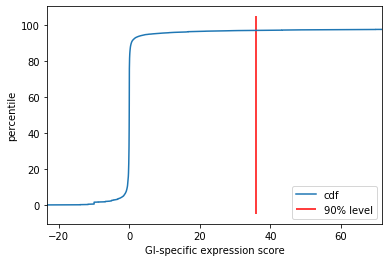

In [754]:
x,f = cumhist(diff_expression.mean(1))

plt.plot(x, 100*f, label='cdf')
plt.xlim([min(x), 2*q90_thr])
plt.vlines(q90_thr, *plt.gca().get_ylim(), color='r', label='90% level')
plt.legend()
plt.xlabel('GI-specific expression score')
plt.ylabel('percentile')
pass

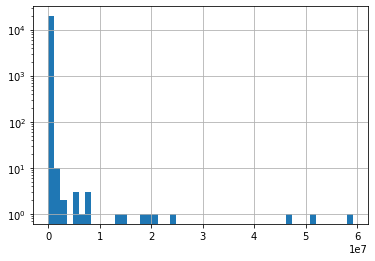

In [649]:
diff_expression.mean(1).hist(bins=50, log=True)
# plt.vlines(q90_thr, *plt.gca().get_ylim(), color='r')
plt.yscale('log')

In [494]:
diff_expression.loc['MUC13']

Sample
duodenum           977.211707
small intestine    883.348475
stomach             52.897500
Name: MUC13, dtype: float64

In [652]:
# diff_expression_upregulated
variants_unique = variants.groupby(['Gene_Name',]).first().reset_index()['Gene_Name']

## Join the Variant table with the table of Upregulated Genes

In [654]:
dfm = (pd.merge(diff_expression_upregulated, #[(diff_expression_upregulated>27).all(1)],
               variants, left_index=True, right_on='Gene_Name')
       .sort_values('Rank', kind='mergesort',)
        .sort_values('CDS.pos.length', kind='mergesort',)
       .sort_values('length', kind='mergesort',)
       .sort_values('Annotation_Impact_Int', kind='mergesort',)
      )
dfm.shape

(34650, 32)

In [656]:
('HTR4' in diff_expression_upregulated.index,
 'HTR4' in dfm.Gene_Name,  
 'HTR4' in  variants
)

(True, False, False)

In [657]:
dfm.ID.str[:3].value_counts()

DEL    23696
.      10954
Name: ID, dtype: int64

In [658]:
dfm.columns

Index(['duodenum', 'small intestine', 'stomach', '#CHROM', 'AA.pos.length',
       'ALT', 'Allele', 'Annotation', 'Annotation_Impact', 'CDS.pos.length',
       'Distance', 'ERRORS', 'FILTER', 'FORMAT', 'Feature_ID', 'Feature_Type',
       'Gene_ID', 'Gene_Name', 'HGVS.c', 'HGVS.p', 'ID', 'POS', 'QUAL', 'REF',
       'RESULT', 'Rank', 'Transcript_BioType', 'cDNA.pos.length', 'type',
       'Annotation_Impact_Int', 'length', 'CDS.length'],
      dtype='object')

In [659]:
fn_out_gi_vcf = 'results/gi_upregulated_variants.vcf'
dfm[[ '#CHROM', 'AA.pos.length',
       'ALT', 'Allele', 'Annotation', 'Annotation_Impact', 'CDS.pos.length',
       'Distance', 'ERRORS', 'FILTER', 'FORMAT', 'Feature_ID', 'Feature_Type',
       'Gene_ID', 'Gene_Name', 'HGVS.c', 'HGVS.p', 'ID', 'POS', 'QUAL', 'REF',
       'RESULT', 'Rank', 'Transcript_BioType', 'cDNA.pos.length', 'type']].to_csv(fn_out_gi_vcf, sep='\t', index=False)

In [509]:
messed_gi_genes = (dfm.groupby(['Gene_Name','duodenum', 'small intestine', 'stomach'])
                   .last().reset_index()
                  )
messed_gi_genes.shape

(579, 32)

In [525]:
set_messed_gi_genes = set(messed_gi_genes.Gene_Name)
variants_messed_gi_genes = variants[variants.Gene_Name.map(lambda x: x in set_messed_gi_genes)]

In [529]:
variants_messed_gi_genes.to_csv('results/gi-variants-passed-homoz.vcf', 
                                sep='\t', index=False)

## Read Morbidity file from OMIM

In [510]:
!head 'refs/morbidmap.txt'

# Copyright (c) 1966-2019 Johns Hopkins University. Use of this file adheres to the terms specified at https://omim.org/help/agreement.
# Generated: 2019-06-08
# See end of file for additional documentation on specific fields
# Phenotype	Gene Symbols	MIM Number	Cyto Location
17,20-lyase deficiency, isolated, 202110 (3)	CYP17A1, CYP17, P450C17	609300	10q24.32
17-alpha-hydroxylase/17,20-lyase deficiency, 202110 (3)	CYP17A1, CYP17, P450C17	609300	10q24.32
2-aminoadipic 2-oxoadipic aciduria, 204750 (3)	DHTKD1, KIAA1630, AMOXAD, CMT2Q	614984	10p14
2-methylbutyrylglycinuria, 610006 (3)	ACADSB, SBCAD	600301	10q26.13
3-M syndrome 1, 273750 (3)	CUL7, 3M1	609577	6p21.1
3-M syndrome 2, 612921 (3)	OBSL1, KIAA0657, 3M2	610991	2q35


In [378]:
morbidity = pd.read_csv('refs/morbidmap.txt', header=None, sep='\t', comment='#')
morbidity.columns = ['phenotype', 'genes', 'MIM_Number', 'location']

In [379]:
morbidity.head()

,phenotype,genes,MIM_Number,location
0,"17,20-lyase deficiency, isolated, 202110 (3)","CYP17A1, CYP17, P450C17",609300,10q24.32
1,"17-alpha-hydroxylase/17,20-lyase deficiency, 2...","CYP17A1, CYP17, P450C17",609300,10q24.32
2,"2-aminoadipic 2-oxoadipic aciduria, 204750 (3)","DHTKD1, KIAA1630, AMOXAD, CMT2Q",614984,10p14
3,"2-methylbutyrylglycinuria, 610006 (3)","ACADSB, SBCAD",600301,10q26.13
4,"3-M syndrome 1, 273750 (3)","CUL7, 3M1",609577,6p21.1


In [380]:
morbidity['genes'] = morbidity.genes.map(lambda x: x.split(','))

In [381]:
morbidities = []
for _, row in morbidity.iterrows():
    for gene in row.genes:
        newrow = row.copy()
        newrow['genes'] = gene
        morbidities.append(newrow)

morbidities = pd.DataFrame(morbidities)

In [382]:
morbidities.shape

(24054, 4)

In [383]:
morbidities.head()

,phenotype,genes,MIM_Number,location
0,"17,20-lyase deficiency, isolated, 202110 (3)",CYP17A1,609300,10q24.32
0,"17,20-lyase deficiency, isolated, 202110 (3)",CYP17,609300,10q24.32
0,"17,20-lyase deficiency, isolated, 202110 (3)",P450C17,609300,10q24.32
1,"17-alpha-hydroxylase/17,20-lyase deficiency, 2...",CYP17A1,609300,10q24.32
1,"17-alpha-hydroxylase/17,20-lyase deficiency, 2...",CYP17,609300,10q24.32


## [todo] Add IBD and other GWAS stats

In [ ]:
# ibd_stats = pd.read_table('refs/iibdgc-trans-ancestry-filtered-summary-stats.tab.gz',)
# ibd_stats.shape

In [531]:
!ls 'refs/GRCh37/clinvar_20190603.vcf.gz'

refs/GRCh37/clinvar_20190603.vcf.gz


## Intersect with ClinVar variants

In [550]:
import gzip

def get_vcf_header(vcf_name):
    open_ = gzip.open if vcf_name.endswith('gz') else open
    with open_(vcf_name) as fh:
        for line in fh:
            line = line.decode()
            if line.startswith('##'):
                continue
            elif line.startswith('#'):
                return line.strip().split('\t')

In [558]:
def parse_info(x):
    outdict={}
    for chunk in x.split(';'):
        kk,vv = chunk.split('=')
        if ',' in vv:
            vv = vv.split(',')
        outdict[kk] = vv
    return outdict

In [661]:
vcf_name = 'refs/GRCh37/clinvar_20190603.vcf.gz'
mafs = pd.read_table(vcf_name, 
                     comment='#', header=None)
mafs.columns = get_vcf_header(vcf_name)
mafs['#CHROM'] = mafs['#CHROM'].map(lambda x: 'chr{}'.format(x))

/tools/miniconda/envs/jupyter-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [663]:
mafs.head(3)

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO
0,chr1,949422,475283,G,A,.,.,AF_ESP=0.00546;AF_EXAC=0.00165;AF_TGP=0.00619;...
1,chr1,949502,542074,C,T,.,.,AF_ESP=0.00015;AF_EXAC=0.00010;ALLELEID=514926...
2,chr1,949523,183381,C,T,.,.,"ALLELEID=181485;CLNDISDB=MedGen:C4015293,OMIM:..."


In [665]:
messed_gi_genes.shape

(579, 32)

In [677]:
messed_gi_genes_w_maf = pd.merge(messed_gi_genes, mafs, on=['#CHROM', 'POS', 'REF', 'ALT' ],)
messed_gi_genes_w_maf.INFO = messed_gi_genes_w_maf.INFO.map(parse_info)
messed_gi_genes_w_maf.shape

(24, 36)

In [678]:
messed_gi_genes_w_maf_wide = pd.concat({kk:pd.Series(vv) for kk,vv in messed_gi_genes_w_maf.set_index(['#CHROM', 'POS', 'REF', 'ALT' ])['INFO'].items()}).unstack()

In [682]:
messed_gi_genes_w_maf_wide[messed_gi_genes_w_maf_wide.CLNSIG != 'Benign']#.iloc[1]

,,,,AF_ESP,AF_EXAC,AF_TGP,ALLELEID,CLNDISDB,CLNDN,CLNHGVS,CLNREVSTAT,CLNSIG,CLNVC,CLNVCSO,CLNVI,GENEINFO,MC,ORIGIN,RS
chr12,49691567,T,C,0.23456,NaN,0.18251,77608,MedGen:CN517202,not_provided,NC_000012.11:g.49691567T>C,no_assertion_provided,not_provided,single_nucleotide_variant,SO:0001483,NaN,PRPH:5630|LOC101927267:101927267,SO:0001627|intron_variant,NaN,2236746
chr7,156802643,A,AGCGGCG,NaN,NaN,0.77017,207475,MedGen:CN169374,not_specified,NC_000007.13:g.156802644_156802649dupGCGGCG,"[criteria_provided, _single_submitter]",Likely_benign,Duplication,SO:1000035,NaN,MNX1:3110,NaN,1,548755417
chrX,41587218,T,C,0.80623,0.83419,0.86517,167922,MedGen:CN169374,not_specified,NC_000023.10:g.41587218T>C,no_assertion_criteria_provided,Likely_benign,single_nucleotide_variant,SO:0001483,NaN,CASK:8573|GPR82:27197,SO:0001627|intron_variant,1,1023065


## Affected genes
- MUC13: IBD GWAS
- KCNJ6: [Keppen-Lubinsky syndrome](https://www.omim.org/entry/614098?search=KCNJ6&highlight=kcnj6)
- HNF4A: Maturity onset diabetes of the young (MODY)

In [683]:
most_messed_gi_genes = messed_gi_genes[messed_gi_genes.RESULT.str.startswith('1/1') &
               (messed_gi_genes.loc[:,'duodenum':'small intestine']>q90_thr).all(1)]

In [684]:
most_messed_gi_genes[most_messed_gi_genes.Gene_Name =='MUC13']

,Gene_Name,duodenum,small intestine,stomach,#CHROM,AA.pos.length,ALT,Allele,Annotation,Annotation_Impact,...,QUAL,REF,RESULT,Rank,Transcript_BioType,cDNA.pos.length,type,Annotation_Impact_Int,length,CDS.length
321,MUC13,977.211707,883.348475,52.8975,chr3,99/511,<DEL>,<DEL>,feature_ablation,HIGH,...,5.0,N,1/1:DELLY,5/5,processed_transcript,335/2876,cnv,3,4045,1240.0


In [692]:
# most_messed_gi_genes.sort_values('Annotation_Impact_Int', ascending=False)

In [688]:
df_messed_morb = pd.merge(most_messed_gi_genes, morbidities[['phenotype','genes']],
                          left_on='Gene_Name', right_on ='genes')
df_messed_morb.shape

(91, 34)

In [690]:
df_messed_morb.groupby('Gene_Name').first().shape

(58, 33)

In [691]:
df_messed_morb[df_messed_morb.phenotype.map(lambda x: 'bowel' in x.lower())]

,Gene_Name,duodenum,small intestine,stomach,#CHROM,AA.pos.length,ALT,Allele,Annotation,Annotation_Impact,...,RESULT,Rank,Transcript_BioType,cDNA.pos.length,type,Annotation_Impact_Int,length,CDS.length,phenotype,genes
35,IL23R,135.196918,135.196918,135.196918,chr1,310/629,<DEL>,<DEL>,feature_ablation,HIGH,...,1/1:DELLY,4/6,protein_coding,1100/2912,cnv,3,81,961.0,"{Inflammatory bowel disease 17, protection aga...",IL23R


In [693]:
# df_messed_morb[df_messed_morb.phenotype.map(lambda x: 'diabetes' in x.lower())]

In [695]:
# df_messed_morb[df_messed_morb.phenotype.map(lambda x: 'ALPI' in x.lower())]

In [698]:
# df_messed_morb#.phenotype.drop_duplicates()

In [699]:
variants.Annotation_Impact.value_counts().index

Index(['HIGH', 'MODIFIER', 'LOW', 'MODERATE'], dtype='object')

In [705]:
messed_gi_genes.groupby('#CHROM')['Gene_Name'].count().sort_index()

#CHROM
chr1     51
chr10    24
chr11    54
chr12    22
chr13     8
chr14    14
chr15    17
chr16    36
chr17    25
chr18     6
chr19    33
chr2     36
chr20    10
chr21     6
chr22    11
chr3     39
chr4     34
chr5     25
chr6     46
chr7     24
chr8     30
chr9      8
chrX     20
Name: Gene_Name, dtype: int64

In [707]:
messed_gi_genes[messed_gi_genes['Gene_Name']=='INSM1']

,Gene_Name,duodenum,small intestine,stomach,#CHROM,AA.pos.length,ALT,Allele,Annotation,Annotation_Impact,...,QUAL,REF,RESULT,Rank,Transcript_BioType,cDNA.pos.length,type,Annotation_Impact_Int,length,CDS.length
252,INSM1,158.32625,120.273589,299.664704,chr20,NaN,<DEL>,<DEL>,feature_ablation,HIGH,...,5.0,N,1/1:DELLY,1/1,protein_coding,NaN,cnv,3,25810,NaN


In [701]:
mask = (messed_gi_genes.RESULT.str.startswith('1/1') &
               (messed_gi_genes.loc[:,'duodenum':'stomach']>10*q90_thr).all(1))
print(sum(mask))
messed_gi_genes[mask]

49


,Gene_Name,duodenum,small intestine,stomach,#CHROM,AA.pos.length,ALT,Allele,Annotation,Annotation_Impact,...,QUAL,REF,RESULT,Rank,Transcript_BioType,cDNA.pos.length,type,Annotation_Impact_Int,length,CDS.length
0,A1CF,1.874946e+04,2.377859e+04,8.681230e+02,chr10,NaN,T,T,downstream_gene_variant,MODIFIER,...,343.77,G,"1/1:30:1.0:372,30,0:10:0,10:nan:0,0,2,8:0.0:0....",9/11,processed_transcript,NaN,exome,2,1,NaN
2,ABCG5,2.090500e+07,2.079400e+07,3.700000e+04,chr2,NaN,G,G,intron_variant,MODIFIER,...,851.27,GC,"1/1:1:0.872:886,1,0:39:5,34:nan:2,3,28,6:5.79:...",7/9,protein_coding,NaN,exome,2,1,NaN
11,ACTL6B,3.700000e+04,3.700000e+04,2.220000e+05,chr7,NaN,<DEL>,<DEL>,feature_ablation,HIGH,...,5.0,N,1/1:DELLY,6/14,protein_coding,NaN,cnv,3,11944,NaN
21,AKR1B10,1.230222e+03,7.486475e+02,8.013167e+02,chr7,313/316,G,G,downstream_gene_variant,MODIFIER,...,2285.77,A,"1/1:99:1.0:2314,183,0:61:0,61:nan:0,0,30,31:0....",9/9,processed_transcript,1257/1590,exome,2,1,14.0
22,AKR1C4,2.065534e+03,1.027778e+03,9.479504e+02,chr10,250/323,A,A,downstream_gene_variant,MODIFIER,...,1597.77,G,"1/1:99:1.0:1626,120,0:40:0,40:nan:0,0,2,38:0.0...",9/9,retained_intron,1002/1414,exome,2,1,223.0
37,APOBEC1,1.180300e+07,1.147000e+07,5.550000e+05,chr12,80/236,A,A,intron_variant,MODIFIER,...,2694.77,C,"1/1:99:1.0:2723,205,0:68:0,68:nan:0,0,65,3:0.0...",4/4,protein_coding,261/879,exome,2,1,471.0
40,ARL14,3.555327e+03,2.575513e+03,4.906072e+03,chr3,NaN,<DEL>,<DEL>,feature_ablation,HIGH,...,5.0,N,1/1:DELLY,1/1,protein_coding,NaN,cnv,3,4045,NaN
49,AVPR1B,3.700000e+04,3.700000e+04,1.110000e+05,chr1,NaN,<DEL>,<DEL>,feature_ablation,HIGH,...,5.0,N,1/1:DELLY,1/2,protein_coding,NaN,cnv,3,81,NaN
59,C11orf86,5.443231e+04,5.658765e+04,1.746224e+03,chr11,NaN,<DEL>,<DEL>,feature_ablation,HIGH,...,5.0,N,1/1:DELLY,1/2,protein_coding,NaN,cnv,3,17703,NaN
65,C6orf222,4.932334e+03,5.272150e+03,8.145597e+02,chr6,582/652,<DEL>,<DEL>,feature_ablation,HIGH,...,5,N,1/1:DELLY,4/12,protein_coding,1922/3736,cnv,3,9047,215.0


In [104]:
!rm results/all-variants-gencode.bed

In [145]:
messed_gi_genes_all = messed_gi_genes[(messed_gi_genes[['duodenum', 'small intestine', 'stomach',]]>27).all(1)]


In [146]:
gi_upregulated_list = gi_upregulated[gi_upregulated.all(1)].index.tolist()